# Outline
- **[1- Problem Statement](#1)**
    - [1.1 The Challenge](#1.1)
    - [1.2 About Dataset](#1.2)
- **[2- Loading Packages](#2)**

### EDA
- **[3- Univariate Analysis](#3)**
- **[4- Bivariate Analysis](#4)**
- **[5- Conclusion](#5)**

### Machine Learning
- **[6- Data Preprocessing](#6)**
- **[7- BEAST Model 💡](#7)**
- **[8- Error Analysis](#8)**
- **[9- Voting](#9)**
- **[10- Last Submission](#10)**


<a name='1'></a>
# 1- Problem Statement
<a name='1.1'></a>
### 1.1 The Challenge
<font size=4>
For this Competition, The task is to predict whether a customer continues with their account or closes it (e.g., churns)!
</font>

<a name='1.2'></a>
### 1.2 About Dataset

<font size=4>
The bank customer churn dataset is a commonly used dataset for predicting customer churn in the banking industry. It contains information on bank customers who either left the bank or continue to be a customer. The dataset includes the following attributes:

- Customer ID: A unique identifier for each customer
- Surname: The customer's surname or last name
- Credit Score: A numerical value representing the customer's credit score
- Geography: The country where the customer resides (France, Spain or Germany)
- Gender: The customer's gender (Male or Female)
- Age: The customer's age.
- Tenure: The number of years the customer has been with the bank
- Balance: The customer's account balance
- NumOfProducts: The number of bank products the customer uses (e.g., savings account, credit card)
- HasCrCard: Whether the customer has a credit card (1 = yes, 0 = no)
- IsActiveMember: Whether the customer is an active member (1 = yes, 0 = no)
- EstimatedSalary: The estimated salary of the customer
- Exited: Whether the customer has churned (1 = yes, 0 = no)
    
</font>

<div style="text-align:center">
    <img src="https://imgur.com/XGAjQji.png" alt="Bank Churn Picture" style="width:90%;">
</div>
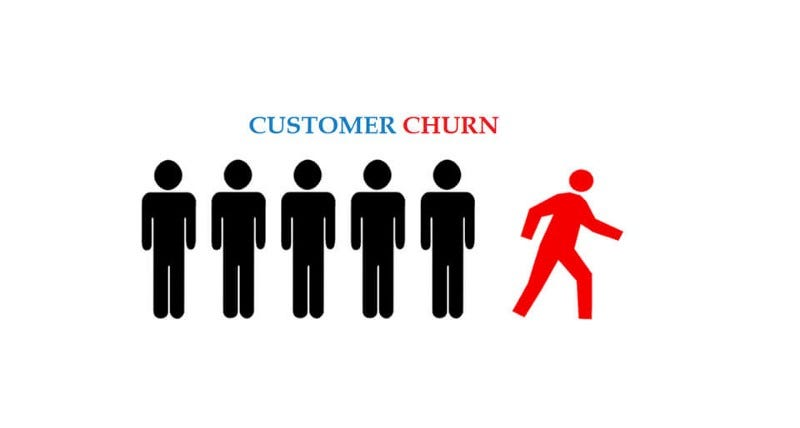

<a name='2'></a>
# 2- Loading Packages

In [279]:
import seaborn as sns, matplotlib.pyplot as plt, pandas as pd, numpy as np

from sklearn import set_config
from sklearn.pipeline import Pipeline, make_pipeline, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,StandardScaler

from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV, train_test_split

from sklearn.metrics import accuracy_score,roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

import warnings 
warnings.filterwarnings('ignore')

In [280]:
data = pd.read_csv('/kaggle/input/playground-series-s4e1/train.csv')

In [281]:
data.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [282]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [283]:
data['IsActiveMember'].unique()

array([0., 1.])

In [284]:
data['IsActiveMember']=data['IsActiveMember'].astype(int)

In [285]:
data.duplicated().sum()

0

In [286]:
data.isna().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [287]:
data['id']

0              0
1              1
2              2
3              3
4              4
           ...  
165029    165029
165030    165030
165031    165031
165032    165032
165033    165033
Name: id, Length: 165034, dtype: int64

In [288]:
data['CustomerId'].duplicated().sum()

141813

In [289]:
data[data['CustomerId']==15673599].head(3)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
42,42,15673599,Mamelu,684,Germany,Female,31.0,3,142293.54,3,1.0,0,146650.6,1
99,99,15673599,Williamson,618,Spain,Male,35.0,5,133476.09,1,0.0,1,154843.4,0
2736,2736,15673599,Williamson,618,Spain,Male,32.0,5,0.00,2,0.0,1,154843.4,0


<font size=4> CustomerId is not unique, we can't use it as identifier for rows. </font>

In [290]:
data.drop(columns=['CustomerId'],inplace=True)

In [291]:
data.head(2)

,id,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,Okwudilichukwu,668,France,Male,33.0,3,0.0,2,1.0,0,181449.97,0
1,1,Okwudiliolisa,627,France,Male,33.0,1,0.0,2,1.0,1,49503.50,0


In [292]:
data['Exited'].value_counts()

Exited
0    130113
1     34921
Name: count, dtype: int64

<a name='3'></a>
# 3- Univariate Analysis

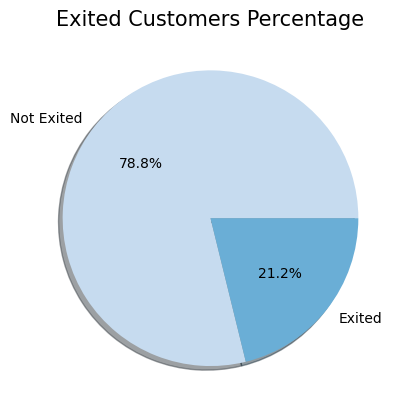

In [293]:

sns.set_palette('Blues',3)
plt.pie(data['Exited'].value_counts(),labels=['Not Exited','Exited'],shadow=True,autopct='%1.1f%%')
plt.title('Exited Customers Percentage',fontsize=15)
plt.show()

<font size=4 >only $21$% are Exited </font>

In [294]:
data['Surname'].value_counts()

Surname
Hsia         2456
T'ien        2282
Hs?          1611
Kao          1577
Maclean      1577
             ... 
Samaniego       1
Lawley          1
Bonwick         1
Tennant         1
Elkins          1
Name: count, Length: 2797, dtype: int64

There's <font size=4>alot</font> of unique names in `surname` column, best utilization is to do target encoding for this column.

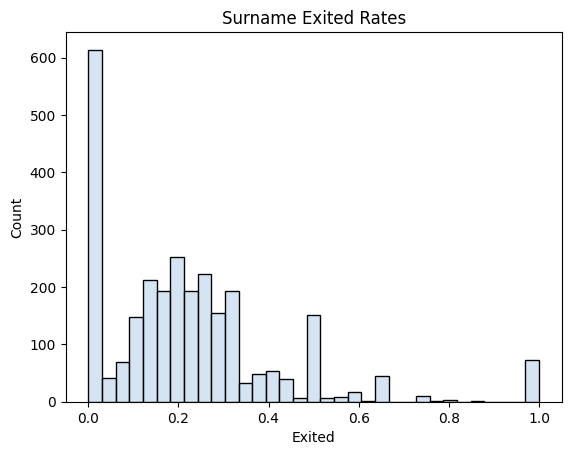

In [295]:
sns.histplot(data.groupby('Surname')['Exited'].mean().sort_values(ascending =False))
plt.title('Surname Exited Rates')
plt.show()

In [296]:
data[data['Surname']=='Onwuamaegbu'].sample(5)

,id,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
131848,131848,Onwuamaegbu,591,France,Male,46.0,4,0.00,2,1.0,1,62905.29,0
92009,92009,Onwuamaegbu,524,France,Female,26.0,9,134950.19,1,0.0,1,155725.06,0
159022,159022,Onwuamaegbu,637,Spain,Female,31.0,8,0.00,2,1.0,1,169802.73,0
150993,150993,Onwuamaegbu,708,France,Male,57.0,6,109044.00,1,1.0,1,125041.02,1
135172,135172,Onwuamaegbu,630,Spain,Female,45.0,1,0.00,2,1.0,0,169802.73,0


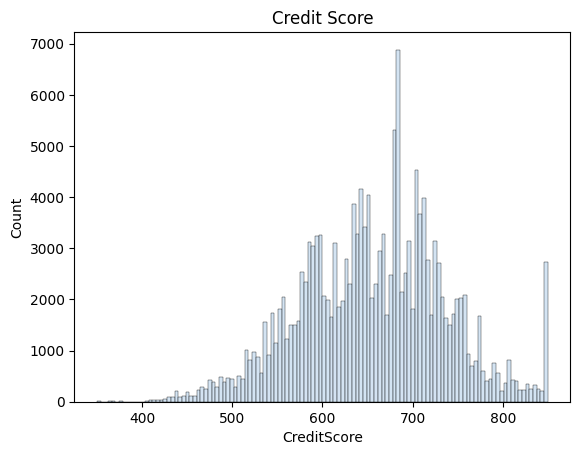

In [297]:
sns.histplot(data['CreditScore'])
plt.title('Credit Score')
plt.show()

In [298]:
data['Geography'].value_counts(normalize=True)

Geography
France     0.570882
Spain      0.219428
Germany    0.209690
Name: proportion, dtype: float64

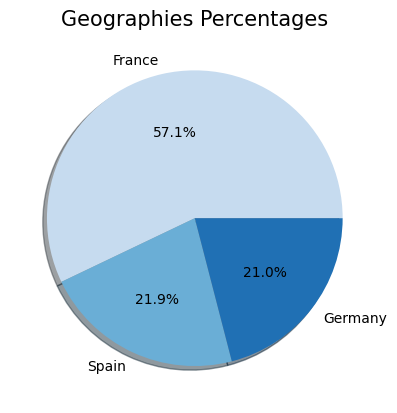

In [299]:
sns.set_palette('Blues',3)
plt.pie(data['Geography'].value_counts(),labels=data['Geography'].value_counts().index,
        shadow=True,autopct='%1.1f%%')
plt.title('Geographies Percentages',fontsize=15)
plt.show()

<font size=4>Most Customers fall in `France` Category, this feature could be encoded with *one hot encoder*</font>

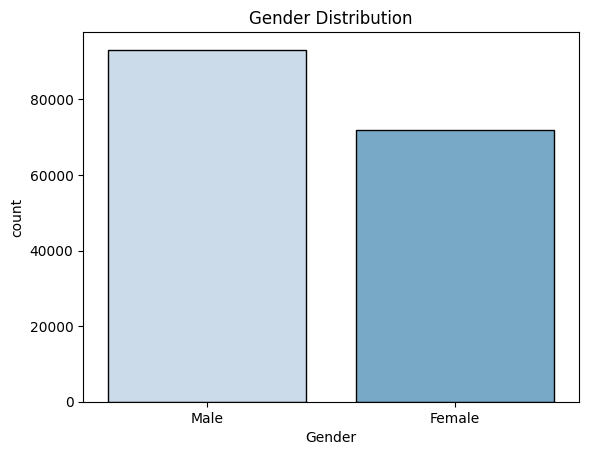

In [304]:
sns.countplot(data=data,x='Gender',edgecolor='black')
plt.title('Gender Distribution')
plt.show()

<font size=4> Most Custmers data was for `Male` Customers </font>

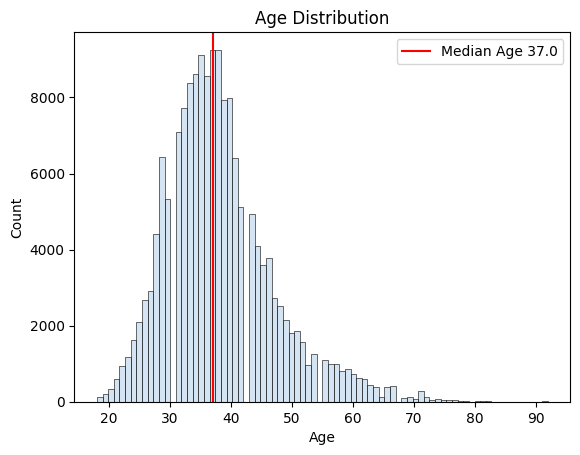

In [305]:
sns.histplot(data=data,x='Age',bins=80)
plt.axvline(data['Age'].median(),color='r',label=f"Median Age {data['Age'].median()}")
plt.title('Age Distribution');plt.legend()
plt.show()

<font size=4> I notice that `Age` column hasn't extreme values ( in both ways ), minimum value is 18 which is realistic to banks data</font>

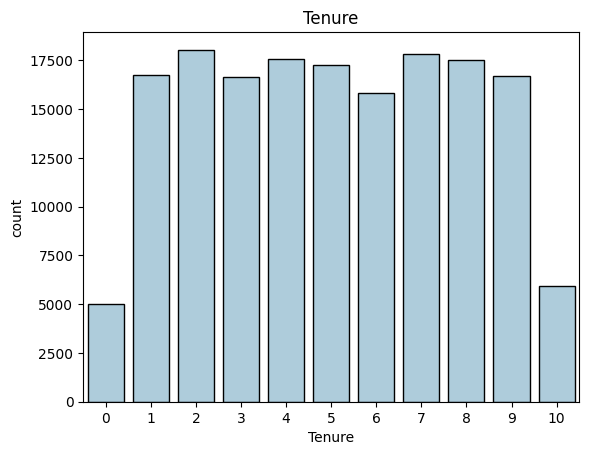

In [306]:
sns.countplot(data=data,x='Tenure',color='#A6CEE3',edgecolor='black')
plt.title('Tenure');plt.show()

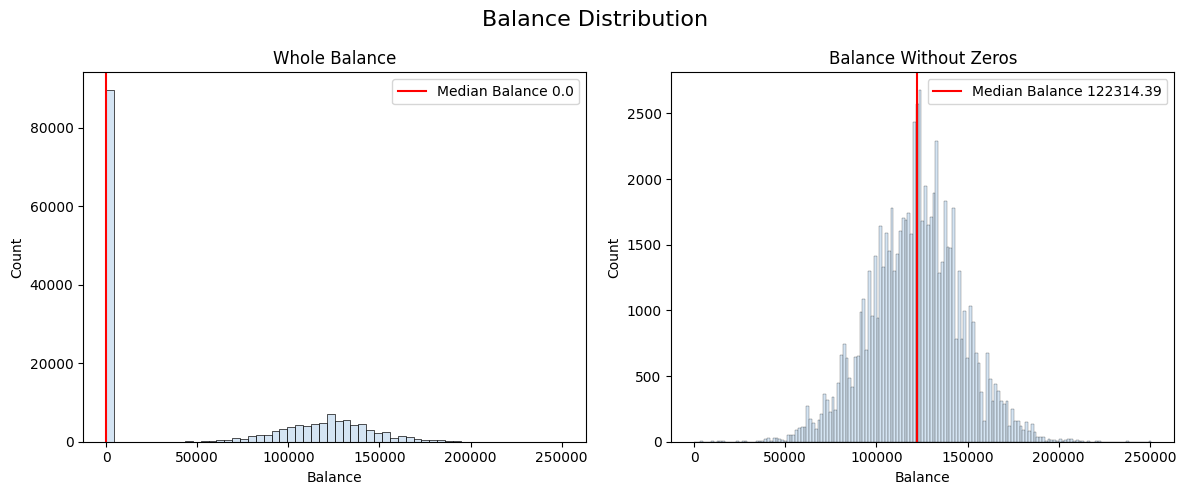

In [307]:
fig, ax = plt.subplots(1,2,figsize=(12,5))
sns.histplot(data=data,x='Balance',ax=ax[0],edgecolor='black')
sns.histplot(data=data[data['Balance']!=0],x='Balance',ax=ax[1],edgecolor='black')
ax[0].axvline(data['Balance'].median(),color='r',label=f"Median Balance {data['Balance'].median()}")
ax[0].set_title('Whole Balance')


kk = data[data['Balance']!=0]['Balance'].median()
ax[1].axvline(kk,color='r',label=f"Median Balance {kk}")
ax[1].set_title('Balance Without Zeros')
fig.suptitle('Balance Distribution',fontsize=16);ax[0].legend();ax[1].legend();fig.tight_layout()
plt.show()

<font size = 4> We seperate `Balance` Feature to (all) and (without zeros) because of huge presence for zero value</font>
<font size = 4> This can be explained because alot of people open account on the bank for another operations like urgent transactions but don't save $$ in it.</font>

In [308]:
data['Balance'].value_counts()

Balance
0.00         89648
124577.33       88
127864.40       64
122314.50       63
129855.32       59
             ...  
125824.21        1
158741.56        1
126815.52        1
61172.57         1
110993.29        1
Name: count, Length: 30075, dtype: int64

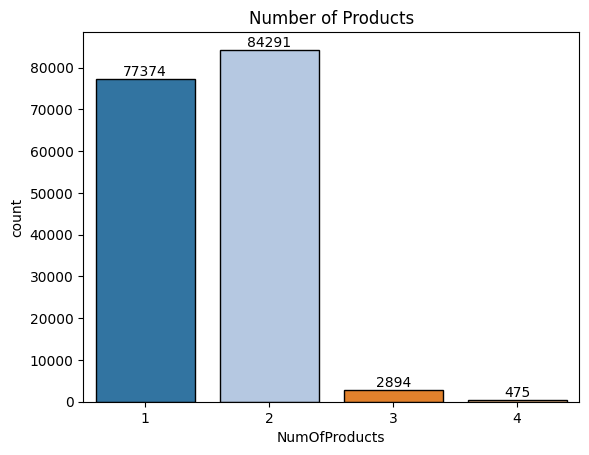

In [310]:
g= sns.countplot(data=data,x='NumOfProducts',palette='tab20',edgecolor='black')
g.bar_label(g.containers[0])
plt.title('Number of Products')
plt.show()

<font size =4 >only **few** people with high number of products</font>

<a name='NOP'></a>
<details>
<summary>I did some online search to understand more about this feature, here is the results (tap to show details)</summary>

## Understanding the Importance of Number of Products in Churn Prediction

Understanding the number of products a customer holds with the bank can be a crucial predictor for churn prediction models. Here's why:

- Engagement: Generally, the more products a customer has with a bank, the more engaged they are with that bank. Engaged customers are less likely to churn because they have invested more in the bank's ecosystem.

- Customer Lifetime Value (CLV): Customers with multiple products tend to have higher CLV. They generate more revenue for the bank over their lifetime compared to customers with only one product.

- Cross-Selling Opportunities: The number of products a customer has can also indicate potential opportunities for cross-selling or upselling additional products. Understanding this can inform targeted marketing strategies aimed at increasing the number of products per customer.

- Risk Management: Customers with a diverse portfolio of products may be less likely to churn because they have deeper relationships with the bank. Conversely, customers with only one product may be at higher risk of churn if they find a better offer elsewhere.

- Data Quality: In some cases, the number of products a customer has can also serve as a proxy for data quality. For instance, if a customer has an unusually high or low number of products compared to similar customers, it could indicate errors in the data that need to be investigated.

</details>


In [311]:
data['IsActiveMember'].value_counts()

IsActiveMember
0    82885
1    82149
Name: count, dtype: int64

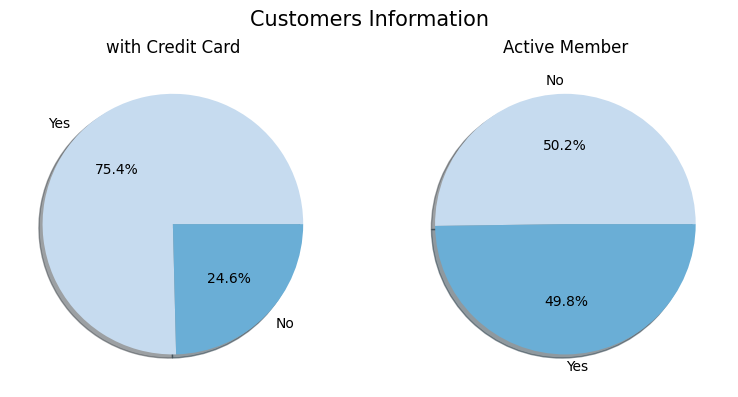

In [312]:
fig, ax=  plt.subplots(1,2,figsize=(8,4))
sns.set_palette('Blues',3)
ax[0].pie(data['HasCrCard'].value_counts(),labels=['Yes','No'],
        shadow=True,autopct='%1.1f%%')
ax[0].set_title('with Credit Card')
ax[1].pie(data['IsActiveMember'].value_counts(),labels=['No','Yes'],
        shadow=True,autopct='%1.1f%%')
ax[1].set_title('Active Member')

fig.suptitle('Customers Information',fontsize=15)
fig.tight_layout()
plt.show()

<font size= 4>This `High` percentages of non-Active members, This feature may be helpful to predict Exited..</font>

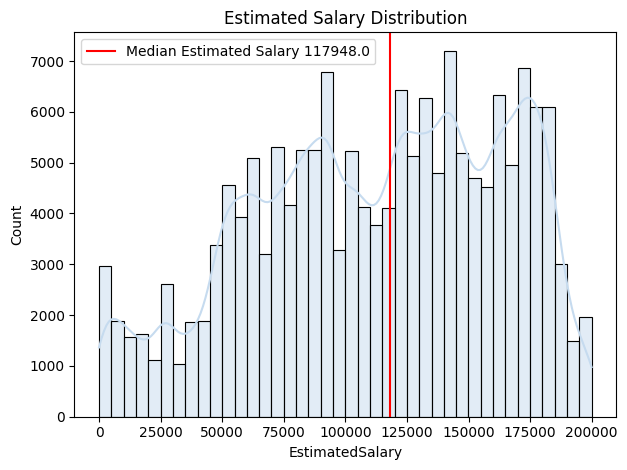

In [313]:
sns.histplot(data=data,x='EstimatedSalary',bins=40,kde=True)
plt.axvline(data['EstimatedSalary'].median(),color='r',label=f"Median Estimated Salary {data['EstimatedSalary'].median()}")

plt.title('Estimated Salary Distribution');plt.tight_layout();plt.legend()
plt.show()

<font size =4>very high range of estimated salary feature, it highly will greatly affect linear models and ANN</font>

<a name='4'></a>
# 4- Bivariate Analysis

In [314]:
data.groupby('Geography')['Exited'].mean()

Geography
France     0.165282
Germany    0.378952
Spain      0.172176
Name: Exited, dtype: float64

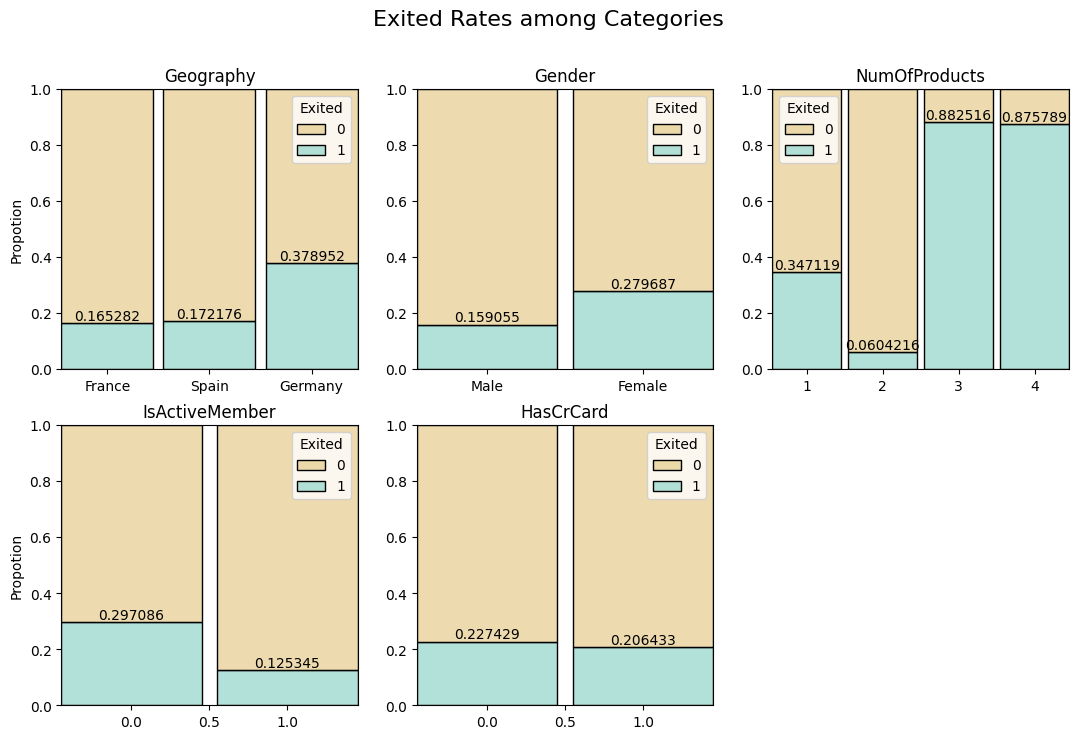

In [315]:
plt.figure(figsize=(13, 8))
for i, c in enumerate(['Geography','Gender','NumOfProducts','IsActiveMember','HasCrCard']):
    plt.subplot(2,3,i+1)
    ax = sns.histplot(x=c, hue='Exited', data=data,palette='BrBG',edgecolor='black'
                 ,multiple='fill',discrete=True,shrink=.9)
    ax.bar_label(ax.containers[0])
    ax.set_xlabel('')
    ax.set_title(c)
    if i%3==0: ax.set_ylabel('Propotion')
    else: ax.set_ylabel('')
        
plt.suptitle('Exited Rates among Categories',size=16)
fig.tight_layout()
plt.show()

- <font size =4>`Geography`: We notice that highest Exited Rate for countries is **Germany**, when France and Spain have almost equal Exited Rate.</font>
- <font size =4>`Gender`: Althoght men category has higher presence in the data, but **Female** category has higher Exited rate.</font>
- <font size =4>`Number Of Products`: in lower number of products there's lower Exited rates, when at 3,4 there's high exited rate(notice that these category counting is imbalanced).. the big gap between 1 and 2 may be confusing because of [NumOfProducts](#NOP) feature facts we disscussed ealier.</font>
- <font size =4> `Is Active Member`: As expected when member is not active member, there's chance to churn.</font>

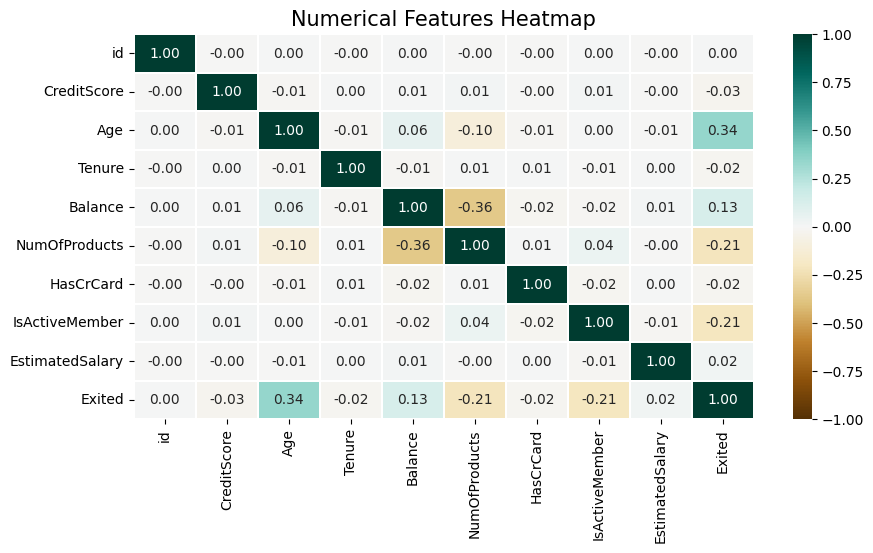

In [316]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(numeric_only=True),cmap='BrBG',center=0,annot=True,vmin=-1,fmt='.2f',linewidths=.1)
plt.title('Numerical Features Heatmap',size=15)
plt.show()

- <font size=4> Heatmap shows (linear) correlations between all numeric features</font>
- <font size=4> `Exited` has **Weak** linear correlations with each of ( Age, SurnameExitedRate, IsActiveMember, NumOfProducts, Balance ) -ordered from highest to lowest-.

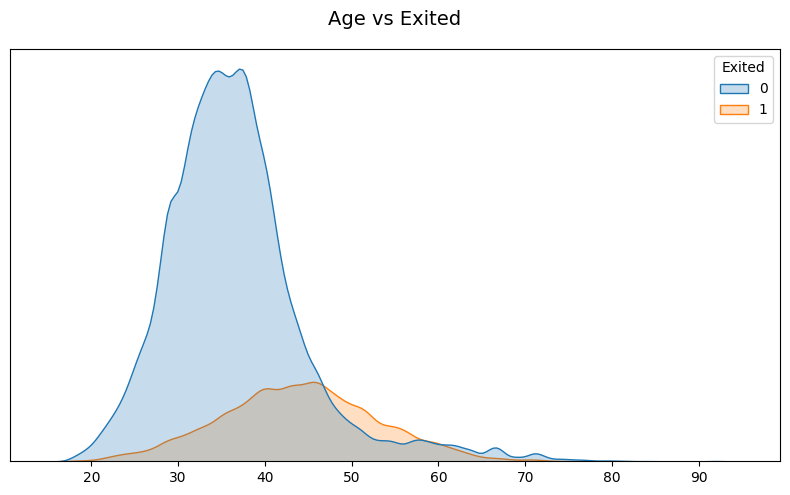

In [87]:
sns.set_palette('tab10')

fig = plt.figure(figsize=(8,5))
g = sns.kdeplot(data = data,x='Age',hue='Exited',label='Exited',fill=True)
g.set_xlabel('');g.set_ylabel('');plt.yticks([])

fig.suptitle(f"Age vs Exited",fontsize=14)
fig.tight_layout()
plt.show()

- <font size=4> As showed in plot, Exited Ages Distribution is Normal( there isn't specific age category showing higher presence than others), Age distribuiton skewness presented in non-exited come from the fact that most instances in data are non-exited members</font>

In [37]:
!pip install category_encoders

In [38]:
from category_encoders import TargetEncoder
t_encoder = TargetEncoder()
data['SurnameExitedRate'] = t_encoder.fit_transform(data['Surname'],data['Exited'])

<Figure size 1200x1200 with 0 Axes>

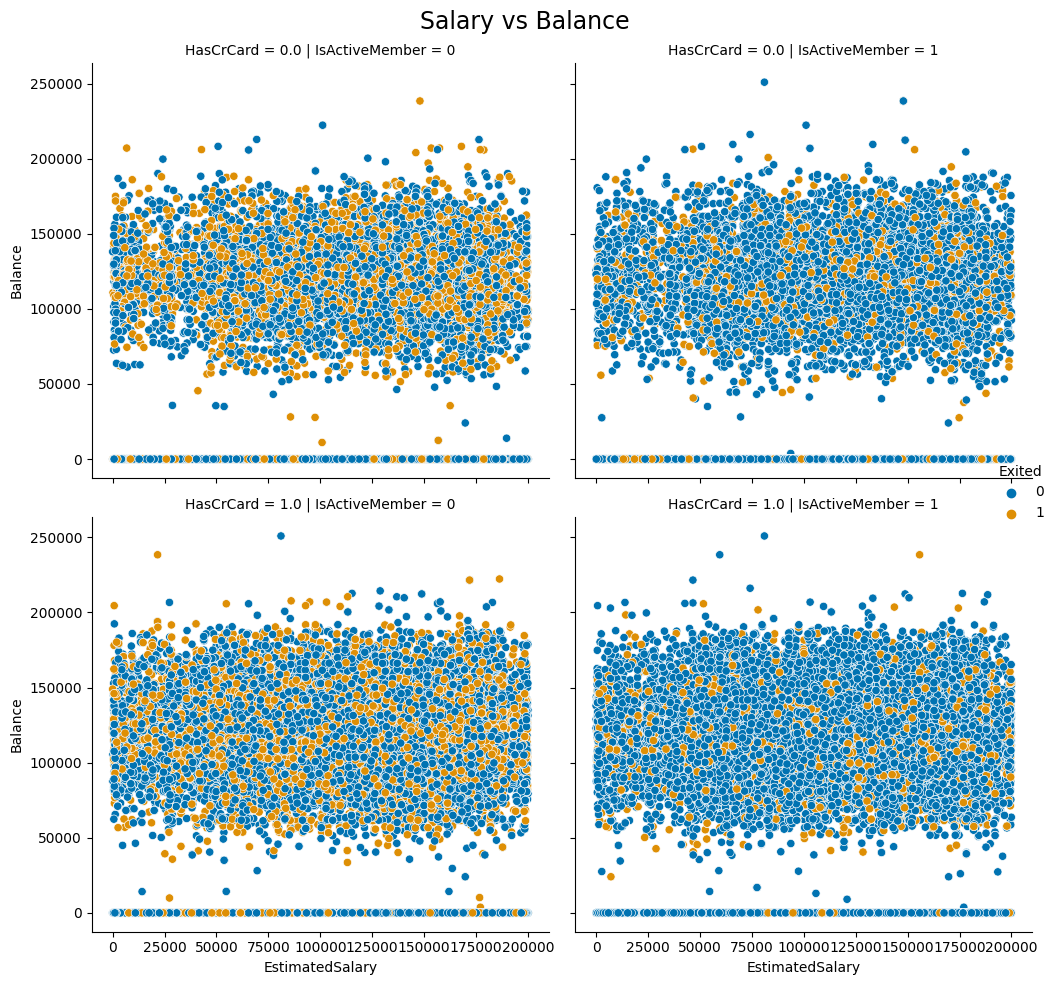

In [65]:
plt.figure(figsize=(12,12))
sns.relplot(data=data,x='EstimatedSalary',y='Balance',hue='Exited',col='IsActiveMember',row='HasCrCard',kind='scatter',palette=sns.color_palette('colorblind',2))
plt.suptitle('Salary vs Balance',fontsize=17);plt.tight_layout()
plt.show()

- <font size=4> Basic plot tells that no any showing relationship between estimated salary and balance in the bank, but when looking at `Exited` hue, we can see that alot of **Exited Customers** has not Credit Card and were non-active members.</font>
> note: we can proof this visualizations with numbers in next cell:

In [67]:
data.groupby(['HasCrCard','IsActiveMember'])['Exited'].mean()

HasCrCard  IsActiveMember
0.0        0                 0.309427
           1                 0.150573
1.0        0                 0.293253
           1                 0.116704
Name: Exited, dtype: float64

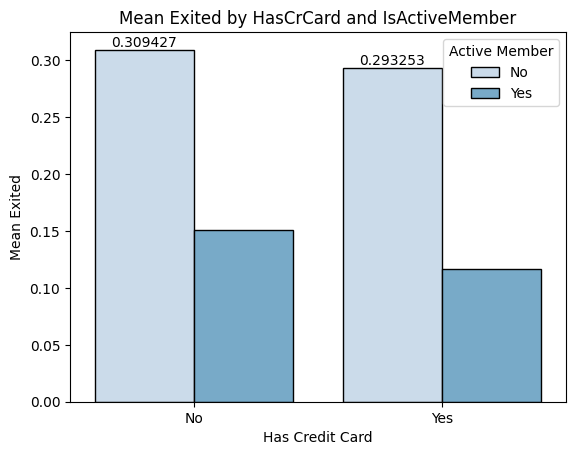

In [82]:

a =sns.barplot(x='HasCrCard', y='Exited', hue='IsActiveMember', data=data, ci=None,edgecolor='black')

a.bar_label(a.containers[0])

plt.title('Mean Exited by HasCrCard and IsActiveMember')
plt.xlabel('Has Credit Card')
plt.ylabel('Mean Exited')
plt.xticks([0, 1], ['No', 'Yes'])
plt.legend(title='Active Member', loc='upper right', labels=['No', 'Yes'])

plt.show()

- <font size=4> we can see that `IsActiveMember` has highest impact, and also holding `Credit Card` make a little on mean exited rates.</font>

In [94]:
data['ActiveCrCard'] = data['HasCrCard']+(data['IsActiveMember'])

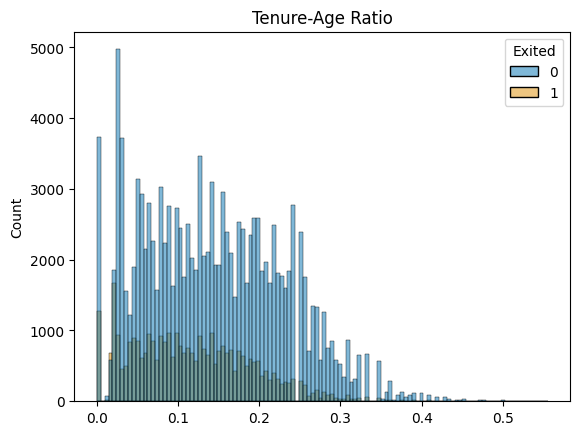

In [92]:
sns.histplot(x=data['Tenure']/data['Age'],data=data,hue='Exited',palette='colorblind')
plt.title("Tenure-Age Ratio")
plt.show()

- <font size=4>by Creating `Tenure-Age` Ratio, We can't see Exited at higher ratios!</font>

In [95]:
data['TenureAgeRatio'] = data['Tenure']/data['Age']

In [96]:
data.groupby('Tenure')['Exited'].mean()

Tenure
0     0.254843
1     0.226134
2     0.194846
3     0.229104
4     0.226387
5     0.220060
6     0.198774
7     0.187591
8     0.197945
9     0.212101
10    0.212726
Name: Exited, dtype: float64

<font size= 3>We can see that Exited Rates are quite similer between different categories in Tenure Feature.</font>

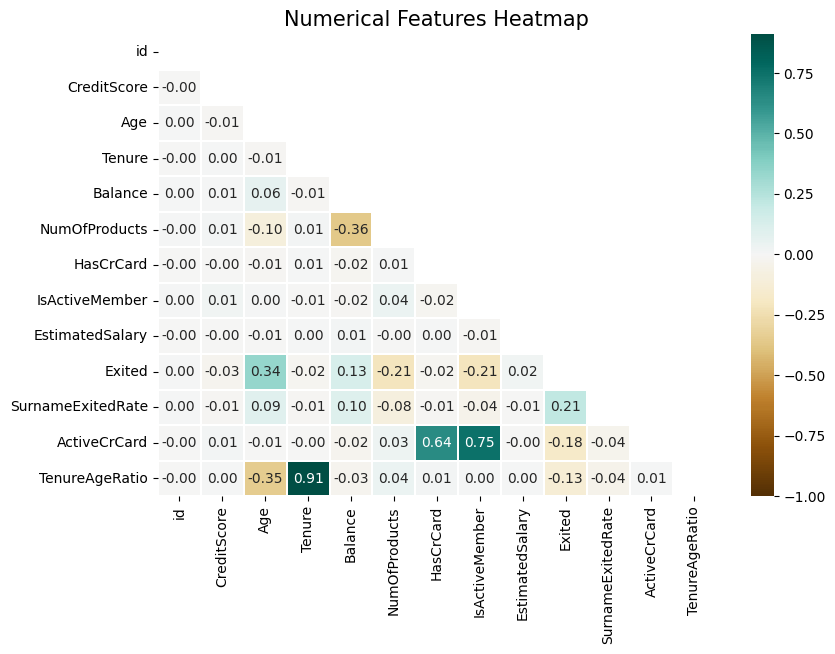

In [97]:
plt.figure(figsize=(9,6))
sns.heatmap(data.corr(numeric_only=True),mask=np.triu(data.select_dtypes(exclude=[object]).corr()),cmap='BrBG',center=0,annot=True,vmin=-1,fmt='.2f',linewidths=.1)
plt.title('Numerical Features Heatmap',size=15)
plt.show()

- <font size=4>We can see that created features (Age-Tenure-Ratio, SurnameExitedRate, ActiveCrCard) may help in out problem. It's clear that we must remove `IsActiveMember`, `HasCrCard` and `Tenure` to solve the problem of multicollinearity that raised because of artificial feature we created earlier. actually leaving them will not hurt very much as candidated machine learning algorithms are robust to this problem.</font>

<a name='6'></a>
# 5- Analysis Conclusion


<font size=5> 
Based on the analysis of the bank customer churn dataset, we have gathered valuable insights to understand and predict customer churn.
<br>
<br>
Firstly, we identified the problem statement, which revolves around predicting whether a customer will continue with their account or churn. The dataset includes various attributes such as customer ID, credit score, geography, gender, age, tenure, balance, number of products, credit card status, activity status, estimated salary, and churn status.
<br>
<br>
Upon initial exploration, we observed that only 21% of the customers in the dataset have churned. However, the customer ID is not unique, making it unsuitable as a row identifier. To handle the surname column, which contains many unique names, we proposed utilizing target encoding. Additionally, most customers are from France, suggesting the use of one-hot encoding for the geography feature.
<br>
<br>
Further analysis revealed that the dataset predominantly consists of male customers, and the age column does not contain extreme values, with a minimum age of 18, which is realistic for banking data. We also identified the presence of zero balances, likely due to customers using the bank for non-saving operations. Additionally, there is a high percentage of non-active members, which could be predictive of churn.
<br>
<br>
Geographically, Germany has the highest churn rate, while females exhibit a higher churn rate despite their lower presence in the dataset compared to males. The number of products used by a customer also influences churn, with higher churn rates observed for customers with three or four products.
<br>
<br>
Correlation analysis revealed weak linear correlations between churn and certain features such as age, surname exited rate, active membership, number of products, and balance. The distribution of ages among churned customers appears normal, indicating no specific age group with a higher propensity to churn.
<br>
<br>
Visualizations indicated that customers who churn tend to have no credit card and are non-active members. Furthermore, the impact of active membership on churn is significant, while holding a credit card has a minor effect.
<br>
<br>
We proposed the creation of new features such as the age-tenure ratio, surname exited rate, and active credit card status, which could enhance predictive performance. To address multicollinearity issues, we suggested removing certain features like active membership, credit card status, and tenure, although retaining them may not significantly impact machine learning algorithms' robustness.
<br>
<br>
In conclusion, leveraging the insights gained from exploratory analysis and feature engineering, we are equipped to build predictive models to identify potential churners and implement targeted retention strategies to mitigate customer attrition.
</font>

<a name='6'></a>
# 6- Data Preprocessing

In [98]:
set_config(transform_output='pandas')

df = pd.read_csv('/kaggle/input/playground-series-s4e1/train.csv')
X,y = df.drop(columns=['Exited']),df['Exited']

X_train, xtemp, y_train, ytemp = train_test_split(X,y, test_size=.3,stratify=y,random_state=3)
X_valid, X_test, y_valid,y_test = train_test_split(xtemp,ytemp,test_size=.5,stratify=ytemp,random_state=322)

In [99]:
print('Training set Shape: ',X_train.shape,y_train.shape)
print('Validation set Shape: ',X_valid.shape,y_valid.shape)
print('Testing set Shape: ',X_test.shape,y_test.shape)
print('\n\n')
print('\nTrain Target Dist: ',y_train.value_counts(normalize=True))
print('\nValid Target Dist: ',y_valid.value_counts(normalize=True))
print('\nTest Target Dist: ',y_test.value_counts(normalize=True))

Training set Shape:  (115523, 13) (115523,)
Validation set Shape:  (24755, 13) (24755,)
Testing set Shape:  (24756, 13) (24756,)




Train Target Dist:  Exited
0    0.788397
1    0.211603
Name: proportion, dtype: float64

Valid Target Dist:  Exited
0    0.788406
1    0.211594
Name: proportion, dtype: float64

Test Target Dist:  Exited
0    0.788415
1    0.211585
Name: proportion, dtype: float64


In [175]:
cat_pipeline = Pipeline([
    ('impute',SimpleImputer(strategy='most_frequent')),
    ('encode',OneHotEncoder(handle_unknown='ignore',sparse=False,drop='first'))
])
num_pipeline = Pipeline([
    ('impute',SimpleImputer(strategy='median')),
])
target_enc_pipeline = Pipeline([
    ('impute',SimpleImputer(strategy='most_frequent')),
    ('encode',TargetEncoder())
])

def ActiveCrCardFunc(d):
    d['ActiveCrCard'] = d['HasCrCard']+ (4*d['IsActiveMember'])+1
    return d[['ActiveCrCard']]

def TenurebyAgeFunc(d):
    d['Age'] = np.log(d['Age'])
    d['TenureAgeRatio'] = d['Tenure']/d['Age']
    return d[['TenureAgeRatio']]

ActiveCrCard_pipeline = make_pipeline(num_pipeline,FunctionTransformer(ActiveCrCardFunc,validate=False))
TenureAge_pipeline = make_pipeline(num_pipeline,FunctionTransformer(TenurebyAgeFunc,validate=False))

preprocessing = ColumnTransformer([
    ('N',num_pipeline,['CreditScore','Balance','EstimatedSalary','Tenure']),
    ('ActiveCrCard',ActiveCrCard_pipeline,['IsActiveMember','HasCrCard']),
#     ('TenureAgeR',TenureAge_pipeline,['Age','Tenure']),
    ('Age',make_pipeline(num_pipeline,FunctionTransformer(func=np.log)),['Age']),
    ('Cat',cat_pipeline,['Geography','Gender','NumOfProducts']),
    ('Tar',target_enc_pipeline,['Surname',
#                                 'NumOfProducts','Gender','Geography','Tenure'
                               ]),
],remainder='drop',verbose_feature_names_out=False)

preprocessing = Pipeline([
    ('Preprocessing for columns',preprocessing),
    ('Scaling',StandardScaler())
])



# preprocessing = ColumnTransformer([
#     ('numerical',num_pipeline,['CreditScore','Balance','EstimatedSalary','Tenure']),
#     ('ActiveCrCard',ActiveCrCard_pipeline,['IsActiveMember','HasCrCard']),
#     ('Age',make_pipeline(num_pipeline,FunctionTransformer(func=np.log)),['Age']),
#     ('category',cat_pipeline,['Geography','Gender','NumOfProducts']),
#     ('surname',surname_pipeline,['Surname']),
# ],remainder='drop',verbose_feature_names_out=False)

# preprocessing = Pipeline([
#     ('Preprocessing for columns',preprocessing),
#     ('Scaling',StandardScaler())
# ])

In [176]:
train_prepared = preprocessing.fit_transform(X_train,y_train).replace(0,-1)
valid_prepared = preprocessing.transform(X_valid).replace(0,-1)
test_prepared = preprocessing.transform(X_test).replace(0,-1)

train_prepared.sample(2)

,CreditScore,Balance,EstimatedSalary,Tenure,ActiveCrCard,Age,Geography_Germany,Geography_Spain,Gender_Male,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,Surname
67850,0.357524,-0.882075,0.797882,-0.722335,1.104824,0.216589,-0.515461,-0.530964,-1.137056,0.976565,-0.13327,-0.053279,-0.604925
24193,2.345293,-0.882075,0.916999,0.705068,1.104824,0.100595,-0.515461,-0.530964,0.879464,0.976565,-0.13327,-0.053279,1.341489


In [177]:
rfmodel = RandomForestClassifier(n_estimators=200,random_state=3,max_depth=10)
rfmodel.fit(train_prepared,y_train)

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=3)

In [178]:
def evaluate_model(model):
    tr_preds = model.predict(train_prepared)
    print('Train Accuracy',accuracy_score(y_train,tr_preds))
    ts_preds = model.predict(valid_prepared)
    print('Validation Accuracy',accuracy_score(y_valid,ts_preds))
    print('\n')
    ts_preds = model.predict_proba(valid_prepared)[:,1]
    tr_preds = model.predict_proba(train_prepared)[:,1]
    print('Train AUC Score',roc_auc_score(y_train,tr_preds))
    print('Validation AUC Score',roc_auc_score(y_valid,ts_preds))
    
evaluate_model(rfmodel)

Train Accuracy 0.8734104896860365
Validation Accuracy 0.8646738032720662


Train AUC Score 0.9098634383459938
Validation AUC Score 0.8882572986419277


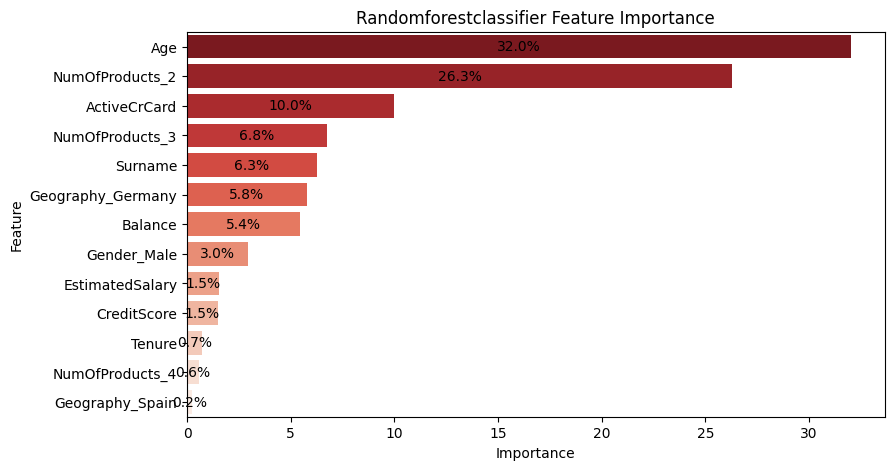

In [179]:
def plot_feature_importance(model):
    feature_importances = model.feature_importances_
    model_name = type(model).__name__
    feature_importance_df = pd.DataFrame({'Feature': train_prepared.columns,
                                          'Importance': feature_importances}).sort_values(by='Importance',ascending=False)
    plt.figure(figsize=(9, 5))
    a = sns.barplot(y=feature_importance_df['Feature'][:18], x=feature_importance_df['Importance'][:18]*100,palette='Reds_r')
    heights = [str(round(height ,1))+'%' for height in a.containers[0].datavalues]
    a.bar_label(a.containers[0], labels=heights, label_type='center')
    plt.title(f'{model_name.capitalize()} Feature Importance')
    plt.show()
    
plot_feature_importance(rfmodel)

In [180]:
tt_preds = rfmodel.predict_proba(test_prepared)[:,1]
print('Test AUC Score',roc_auc_score(y_test,tt_preds))

Test AUC Score 0.8878997391937601


In [181]:
test_data = pd.read_csv('/kaggle/input/playground-series-s4e1/test.csv')
CustomerID = test_data['id']
test_data = preprocessing.transform(test_data)
preds = rfmodel.predict_proba(test_data)[:,1]

In [182]:
submission = pd.DataFrame({'id': CustomerID, 'Exited': preds})
submission.to_csv('submission6.csv', index=False)
submission

,id,Exited
0,165034,0.017969
1,165035,0.815668
2,165036,0.038095
3,165037,0.220477
4,165038,0.310101
...,...,...
110018,275052,0.050976
110019,275053,0.096627
110020,275054,0.037930
110021,275055,0.260096


In [200]:
xgmodel = XGBClassifier(n_estimators=1500,verbose=0,learning_rate=.009,njobs=-1,random_state=3)
xgmodel.fit(train_prepared,y_train,eval_set=[(valid_prepared,y_valid)],eval_metric='auc',early_stopping_rounds=30)

In [184]:
evaluate_model(xgmodel)

Train Accuracy 0.876873003644296
Validation Accuracy 0.8670167642900424


Train AUC Score 0.9097556514183598
Validation AUC Score 0.889517681523884


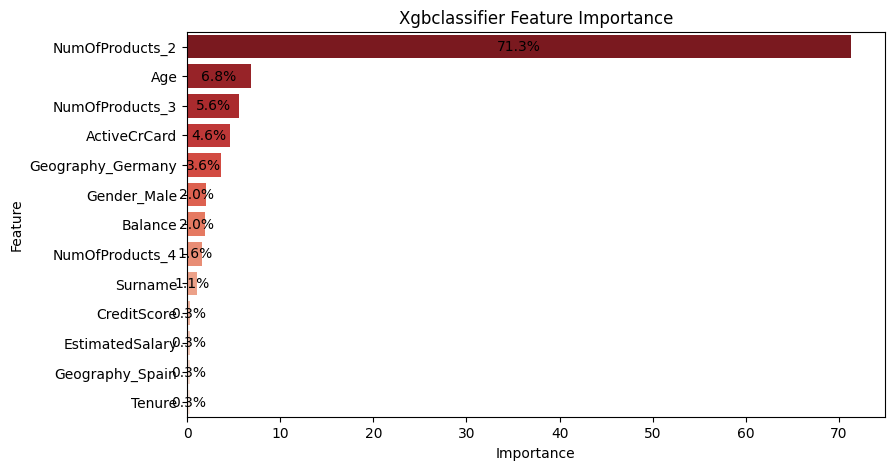

In [185]:
plot_feature_importance(xgmodel)

In [186]:
preds = xgmodel.predict_proba(test_data)[:,1]
submission = pd.DataFrame({'id': CustomerID, 'Exited': preds})
submission.to_csv('submission.csv', index=False)
submission

,id,Exited
0,165034,0.011805
1,165035,0.840204
2,165036,0.021278
3,165037,0.211612
4,165038,0.335802
...,...,...
110018,275052,0.029029
110019,275053,0.071818
110020,275054,0.024755
110021,275055,0.271469


In [138]:
import os
os.environ['KAGGLE_USERNAME'] = 'sayedgamal99'
os.environ['KAGGLE_KEY'] = 'd3519854ae55b486034a1e02752aacfd'

<a name='7'></a>
# 7- BEAST Model 💡

In [139]:
# lgmodel = LGBMClassifier()
# lgmodel.fit(train_prepared,y_train)

[LightGBM] [Info] Number of positive: 24445, number of negative: 91078
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018061 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1399
[LightGBM] [Info] Number of data points in the train set: 115523, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.211603 -> initscore=-1.315291
[LightGBM] [Info] Start training from score -1.315291


LGBMClassifier()

In [ ]:
# WARNING!!: take care to run this part, as it may take much time as expected.


# param_grid = {
#     'learning_rate': [0.01, 0.1, 0.2],
#     'n_estimators': [50, 100, 200],
#     'num_leaves': [20, 30, 40],
#     'max_depth': [5, 10, 15]
# }
# lgmodel = LGBMClassifier(verbose=0)
# grid_search = GridSearchCV(lgmodel, param_grid, cv=5, scoring='accuracy', verbose=1)
# grid_search.fit(train_prepared, y_train)

# # Print the best hyperparameters found
# print("Best Hyperparameters:", grid_search.best_params_)

# # Train the model with the best hyperparameters on the entire training set
# best_model = grid_search.best_estimator_
# # best_model.fit(train_prepared, y_train)

In [ ]:
# print("Best Hyperparameters:", grid_search.best_params_)
# # {'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 200, 'num_leaves': 20}

In [ ]:
# best_model = LGBMClassifier(**grid_search.best_params_)
# best_model.fit(train_prepared,y_train)
# evaluate_model(best_model)

In [197]:
lgmodel= LGBMClassifier(learning_rate=0.0088,max_depth=16,n_estimators=2000,num_leaves=16,random_state=3)
lgmodel.fit(train_prepared,y_train,eval_set=[(valid_prepared,y_valid)],eval_metric='auc')

[LightGBM] [Info] Number of positive: 24445, number of negative: 91078
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017258 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1121
[LightGBM] [Info] Number of data points in the train set: 115523, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.211603 -> initscore=-1.315291
[LightGBM] [Info] Start training from score -1.315291


LGBMClassifier(learning_rate=0.0088, max_depth=16, n_estimators=2000,
               num_leaves=16, random_state=3)

In [196]:
evaluate_model(lgmodel)

Train Accuracy 0.8737653973667582
Validation Accuracy 0.8674611189658655


Train AUC Score 0.904935031917488
Validation AUC Score 0.8900261328259599


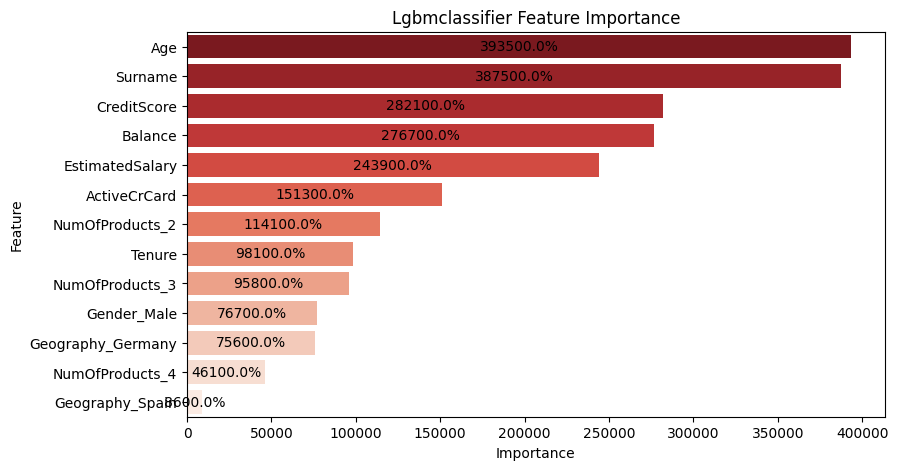

In [189]:
plot_feature_importance(lgmodel)

In [198]:
tt_preds = lgmodel.predict_proba(test_prepared)[:,1]
print('Test AUC Score',roc_auc_score(y_test,tt_preds))

Test AUC Score 0.8902015863720789


In [199]:
preds = lgmodel.predict_proba(test_data)[:,1]
submission = pd.DataFrame({'id': CustomerID, 'Exited': preds})
submission.to_csv('submission.csv', index=False)
submission

,id,Exited
0,165034,0.016958
1,165035,0.816778
2,165036,0.022524
3,165037,0.222833
4,165038,0.342125
...,...,...
110018,275052,0.028594
110019,275053,0.062085
110020,275054,0.025773
110021,275055,0.247113


In [ ]:
# !kaggle competitions submit -c playground-series-s4e1 -f submission.csv -m "lgmodel"

In [ ]:
# !kaggle competitions submissions -c playground-series-s4e1 | head -n 8

In [208]:
cat_model = CatBoostClassifier(
    eval_metric='AUC',
    learning_rate=0.0009,
    iterations=9000,
    random_seed=3
)

cat_model.fit(train_prepared,y_train,eval_set=(valid_prepared,y_valid),verbose=1000)

0:	test: 0.8521608	best: 0.8521608 (0)	total: 24.1ms	remaining: 3m 36s
1000:	test: 0.8812041	best: 0.8812041 (1000)	total: 22.5s	remaining: 2m 59s
2000:	test: 0.8851578	best: 0.8851578 (2000)	total: 43.6s	remaining: 2m 32s
3000:	test: 0.8869103	best: 0.8869103 (3000)	total: 1m 4s	remaining: 2m 9s
4000:	test: 0.8876063	best: 0.8876063 (4000)	total: 1m 25s	remaining: 1m 46s
5000:	test: 0.8880328	best: 0.8880329 (4997)	total: 1m 45s	remaining: 1m 24s
6000:	test: 0.8883372	best: 0.8883372 (6000)	total: 2m 5s	remaining: 1m 2s
7000:	test: 0.8885830	best: 0.8885830 (7000)	total: 2m 26s	remaining: 41.7s
8000:	test: 0.8887639	best: 0.8887639 (8000)	total: 2m 46s	remaining: 20.8s
8999:	test: 0.8889208	best: 0.8889209 (8998)	total: 3m 6s	remaining: 0us

bestTest = 0.8889208707
bestIteration = 8998

Shrink model to first 8999 iterations.


In [209]:
evaluate_model(cat_model)

Train Accuracy 0.8715320758636809
Validation Accuracy 0.8667743890123207


Train AUC Score 0.9000074225149601
Validation AUC Score 0.8889208706802303


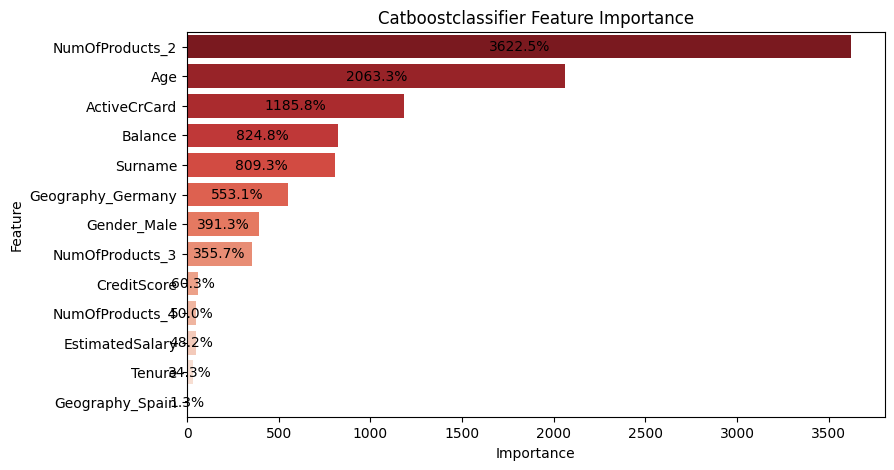

In [214]:
plot_feature_importance(cat_model)

In [215]:
tt_preds = cat_model.predict_proba(test_prepared)[:,1]
print('Test AUC Score',roc_auc_score(y_test,tt_preds))

Test AUC Score 0.8896374269376509


In [216]:
preds = cat_model.predict_proba(test_data)[:,1]
submission = pd.DataFrame({'id': CustomerID, 'Exited': preds})
submission.to_csv('submission.csv', index=False)
submission

,id,Exited
0,165034,0.011311
1,165035,0.847998
2,165036,0.025316
3,165037,0.213955
4,165038,0.329510
...,...,...
110018,275052,0.027698
110019,275053,0.071968
110020,275054,0.026320
110021,275055,0.235229


I will do error analysis for catboost, xgboost and lgbm. then do voting between them and see if it works.

<a name='8'></a>
# 8- Error Analysis

In [249]:
def errorA(models):
    fig, ax = plt.subplots(1,3, figsize=(10, 5))  
    for model in models:
        yv_pred = model.predict(valid_prepared)
        m = confusion_matrix(yv_pred, y_valid, normalize='all')
        disp = ConfusionMatrixDisplay(confusion_matrix=m, display_labels=model.classes_)
        disp.plot(ax=ax[models.index(model)], cmap=plt.cm.Blues, values_format='.4f',colorbar=False)
        ax[models.index(model)].set_title(type(model).__name__)

    plt.tight_layout()
    fig.suptitle('Error Analysis Confusion Matrices',fontsize=14)
    plt.show()

In [240]:
# xgmodel.fit(train_prepared,y_train,eval_set=[(valid_prepared,y_valid)],eval_metric='auc',early_stopping_rounds=30)
# lgmodel.fit(train_prepared,y_train,eval_set=[(valid_prepared,y_valid)],eval_metric='auc')
# cat_model.fit(train_prepared,y_train,eval_set=(valid_prepared,y_valid),verbose=1000)

[0]	validation_0-auc:0.86783
[1]	validation_0-auc:0.86799
[2]	validation_0-auc:0.86892
[3]	validation_0-auc:0.86970
[4]	validation_0-auc:0.86969
[5]	validation_0-auc:0.87018
[6]	validation_0-auc:0.87146
[7]	validation_0-auc:0.87202
[8]	validation_0-auc:0.87275
[9]	validation_0-auc:0.87303
[10]	validation_0-auc:0.87369
[11]	validation_0-auc:0.87427
[12]	validation_0-auc:0.87455
[13]	validation_0-auc:0.87473
[14]	validation_0-auc:0.87512
[15]	validation_0-auc:0.87520
[16]	validation_0-auc:0.87546
[17]	validation_0-auc:0.87556
[18]	validation_0-auc:0.87569
[19]	validation_0-auc:0.87572
[20]	validation_0-auc:0.87608
[21]	validation_0-auc:0.87593
[22]	validation_0-auc:0.87611
[23]	validation_0-auc:0.87633
[24]	validation_0-auc:0.87651
[25]	validation_0-auc:0.87653
[26]	validation_0-auc:0.87665
[27]	validation_0-auc:0.87668
[28]	validation_0-auc:0.87678
[29]	validation_0-auc:0.87681
[30]	validation_0-auc:0.87696
[31]	validation_0-auc:0.87703
[32]	validation_0-auc:0.87702
[33]	validation_0-au

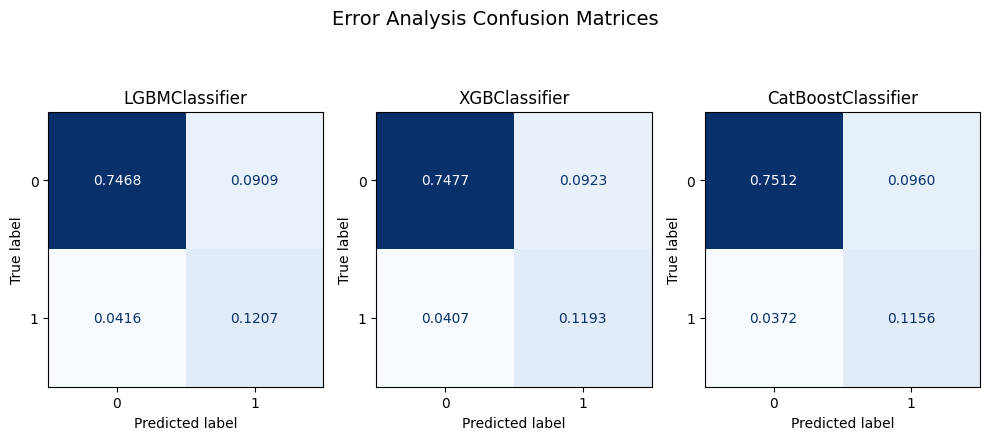

In [250]:
errorA([lgmodel,xgmodel,cat_model])

- <font size=4> From Error Analysis: We notice that **LGBMClassifier** has highest `True Positve Rate`, **CatBoostClassifier** has highest `True Negative Rate`..first thought come to my mind after seeing this to combine these two into one submission and see if it really helps!</font>


In [259]:
lgbm_proba = lgmodel.predict_proba(test_data)
catboost_proba = cat_model.predict_proba(test_data)

<a name='9'></a>
# 9- Voting

In [264]:
average_proba = (lgbm_proba[:,1] + catboost_proba[:,1]) / 2

submission = pd.DataFrame({'id': CustomerID, 'Exited': average_proba})
submission.to_csv('submission.csv', index=False)
submission

,id,Exited
0,165034,0.014135
1,165035,0.832388
2,165036,0.023920
3,165037,0.218394
4,165038,0.335818
...,...,...
110018,275052,0.028146
110019,275053,0.067026
110020,275054,0.026046
110021,275055,0.241171


In [265]:
!kaggle competitions submit -c playground-series-s4e1 -f submission.csv -m "combined model (catboost and LGBM) averaged"

100%|██████████████████████████████████████| 2.83M/2.83M [00:02<00:00, 1.28MB/s]
Successfully submitted to Binary Classification with a Bank Churn Dataset 

In [271]:
!kaggle competitions submissions -c playground-series-s4e1 | head -n 8

fileName             date                 description                                   status    publicScore  privateScore  
-------------------  -------------------  --------------------------------------------  --------  -----------  ------------  
submission.csv       2024-03-14 00:30:19  combined model (catboost and LGBM) averaged   complete  0.88617      0.89112       
submission.csv       2024-03-14 00:27:59  combined model (catboost and LGBM) corrected  complete  0.8854       0.89058       
submission.csv       2024-03-14 00:25:18  combined model (catboost and LGBM)            complete  0.75446      0.76332       
submission.csv       2024-03-11 22:15:13  lgmodel with same features, lr: .009          complete  0.88606      0.89095       
submission.csv       2024-03-11 22:09:29  xgboost with adding target_encoded_features   complete  0.88592      0.89058       


## WOW! Best Score tell now!!

let's try do it with help of xgboost then..

In [272]:
xg_proba = xgmodel.predict_proba(test_data)

In [274]:
average_proba = (lgbm_proba[:,1] + catboost_proba[:,1]+ xg_proba[:,1]) / 3

submission = pd.DataFrame({'id': CustomerID, 'Exited': average_proba})
submission.to_csv('submission.csv', index=False)
submission

,id,Exited
0,165034,0.013358
1,165035,0.834993
2,165036,0.023039
3,165037,0.216133
4,165038,0.335812
...,...,...
110018,275052,0.028440
110019,275053,0.068623
110020,275054,0.025616
110021,275055,0.251270


<a name='10'></a>
# 10- Last Submission

In [275]:
# !kaggle competitions submit -c playground-series-s4e1 -f submission.csv -m "combined models (XGB, Cat and LGBM) classifiers"

100%|██████████████████████████████████████| 2.83M/2.83M [00:02<00:00, 1.46MB/s]
Successfully submitted to Binary Classification with a Bank Churn Dataset 

In [278]:
# !kaggle competitions submissions -c playground-series-s4e1 | head -n 8

fileName             date                 description                                      status    publicScore  privateScore  
-------------------  -------------------  -----------------------------------------------  --------  -----------  ------------  
submission.csv       2024-03-14 00:34:11  combined models (XGB, Cat and LGBM) classifiers  complete  0.88633      0.89118       
submission.csv       2024-03-14 00:30:19  combined model (catboost and LGBM) averaged      complete  0.88617      0.89112       
submission.csv       2024-03-14 00:27:59  combined model (catboost and LGBM) corrected     complete  0.8854       0.89058       
submission.csv       2024-03-14 00:25:18  combined model (catboost and LGBM)               complete  0.75446      0.76332       
submission.csv       2024-03-11 22:15:13  lgmodel with same features, lr: .009             complete  0.88606      0.89095       


<font size=5>best ever!! 😁❤️‍🔥💡</font>

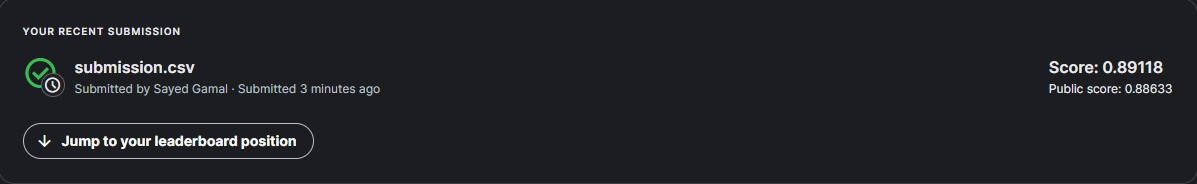

<font size=5> Thank you for reaching this point. I hope you enjoyed the journey. 😁🎉❤️</font>

<font size=4> Note that machine learning process is iterative cyclic in nature, so all results (features, setting hyperparameter) come after alot of *Tuning* process</font>

<div style="text-align:center">
    <img src="https://imgur.com/oM7stCr.gif" alt="Bank Churn Picture" style="width:40%;">
</div>

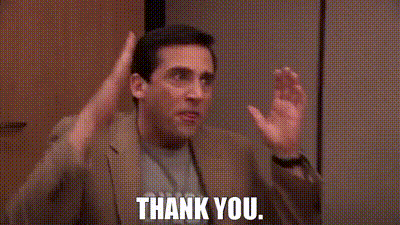